In [2]:
from keras import Sequential
import keras
from keras.optimizers import SGD, Adam
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Lambda
from keras.regularizers import L2
import skimage
import numpy as np
from matplotlib import pyplot as plt
import imageio
import glob

In [10]:
label_names = ["Heart", "Oblong", "Oval", "Round", "Square"]

In [110]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    'face_shape_data/training_set',
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    validation_split=.15,
    subset="training",
    seed=42)

Found 18354 files belonging to 5 classes.
Using 15601 files for training.


In [111]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    "face_shape_data/training_set",
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    validation_split=0.15,
    subset="validation",
    shuffle=True,
    seed=42,
)

Found 18354 files belonging to 5 classes.
Using 2753 files for validation.


In [160]:
test_ds = keras.preprocessing.image_dataset_from_directory(
    'test/test',
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    seed=41)

Found 276 files belonging to 5 classes.


In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, RandomZoom, RandomRotation

model = Sequential([
    Input(shape=(128, 128, 3)),
    Lambda(lambda x: x / 128 - 1),
    Conv2D(32, [3, 3], activation='relu'),
    MaxPooling2D([2, 2], 2),
    Dropout(0.3),
    Conv2D(64, [3, 3], activation='relu'),
    MaxPooling2D([2, 2], 2),
    Dropout(0.3),
    Conv2D(128, [3, 3], activation='relu'),
    MaxPooling2D([2, 2], 2),
    Dropout(0.3),
    Conv2D(256, [3, 3], activation='relu'),
    MaxPooling2D([2, 2], 2),
    Dropout(0.3),
    Conv2D(512, [3, 3], activation='relu'),
    MaxPooling2D([2, 2], 2),
    Dropout(0.3),
    Flatten(),
    Dense(5, activation="softmax")
])

In [114]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_12 (Lambda)              │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │        10,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,821 (6.02 MB)

 Trainable params: 1,578,821 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [128]:
adam_opt = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=adam_opt,metrics=['accuracy'])

In [129]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="model_chkpt.keras",
    save_best_only=True
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [158]:
hist = model.fit(train_ds, batch_size=25, epochs=100, verbose=True, validation_data=val_ds, callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
488/488 ━━━━━━━━━━━━━━━━━━━━ 71s 145ms/step - accuracy: 0.8231 - loss: 0.4851 - val_accuracy: 0.8903 - val_loss: 0.3572
Epoch 2/100
488/488 ━━━━━━━━━━━━━━━━━━━━ 69s 141ms/step - accuracy: 0.8250 - loss: 0.4852 - val_accuracy: 0.8925 - val_loss: 0.3591
Epoch 3/100
488/488 ━━━━━━━━━━━━━━━━━━━━ 64s 131ms/step - accuracy: 0.8352 - loss: 0.4613 - val_accuracy: 0.9201 - val_loss: 0.2901
Epoch 4/100
488/488 ━━━━━━━━━━━━━━━━━━━━ 63s 130ms/step - accuracy: 0.8356 - loss: 0.4547 - val_accuracy: 0.8994 - val_loss: 0.3227
Epoch 5/100
488/488 ━━━━━━━━━━━━━━━━━━━━ 69s 141ms/step - accuracy: 0.8420 - loss: 0.4321 - val_accuracy: 0.9114 - val_loss: 0.2803
Epoch 6/100
103/488 ━━━━━━━━━━━━━━━━━━━━ 50s 132ms/step - accuracy: 0.8550 - loss: 0.4086

KeyboardInterrupt: 

In [163]:
loss, accuracy = model.evaluate(test_ds)
print("acc: ", accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8445 - loss: 0.4406
acc:  0.8550724387168884


In [164]:
model.save('saved_models/face_shape_identifier.keras')

In [165]:
mapping = {"0": "heart", "1": "oblong", "2": "oval", "3": "round", "4": "square"}

Found 4 files belonging to 5 classes.


Batch size: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image 1:
Data range: 0 255
Actual: round, Predicted: round


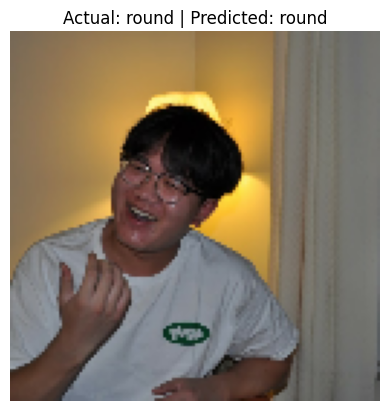

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image 2:
Data range: 0 255
Actual: round, Predicted: oval


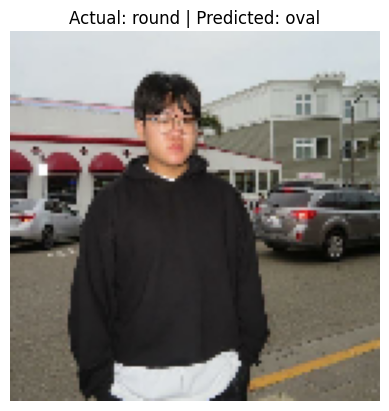

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image 3:
Data range: 3 208
Actual: round, Predicted: round


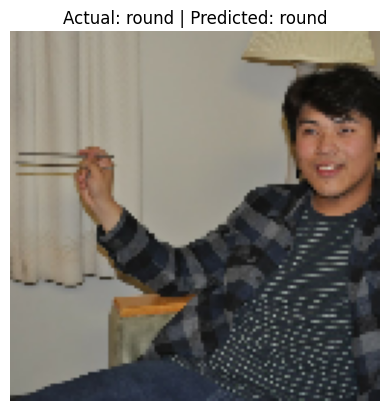

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image 4:
Data range: 0 254
Actual: round, Predicted: round


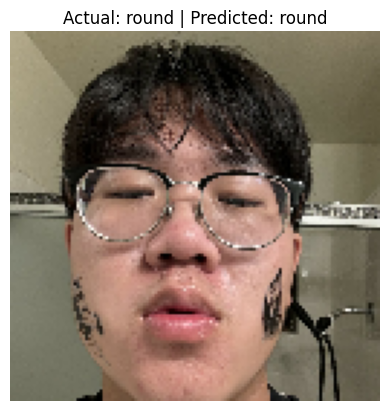

In [181]:
manual_ds = keras.preprocessing.image_dataset_from_directory(
    'manual/',
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    seed=40)

for images, labels in manual_ds.take(1):  # Take the first batch
    print('Batch size:', images.shape[0])
    for i in range(min(10, images.shape[0])):  # Loop through the first 10 images
        image = images[i].numpy().astype('uint8')
        label = labels[i].numpy()
        
        # Predict the label for the image
        predicted_label = np.argmax(model.predict(np.expand_dims(image, axis=0)), axis=1)[0]
        
        # Display details and the image
        print(f"Image {i+1}:")
        print('Data range:', image.min(), image.max())
        print(f"Actual: {mapping[str(label)]}, Predicted: {mapping[str(predicted_label)]}")
        
        # Display the image with the actual and predicted labels
        plt.imshow(image)
        plt.title(f"Actual: {mapping[str(label)]} | Predicted: {mapping[str(predicted_label)]}")
        plt.axis('off')
        plt.show()